## House Loan Eligiblity Prediction

## 1. Import required libraries and read the dataset.

In [43]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pickle

import warnings
warnings.filterwarnings('ignore')

In [60]:
df = pd.read_csv('loan_approval_data.csv')

## 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [61]:
df.head(5)

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,lp001002,male,no,0.0,graduate,no,5849,0.0,NaN,360.0,1.0,urban,y
1,lp001003,male,yes,1.0,graduate,no,4583,1508.0,128.0,360.0,1.0,rural,n
2,lp001005,male,yes,0.0,graduate,yes,3000,0.0,66.0,360.0,1.0,urban,y
3,lp001006,male,yes,0.0,not graduate,no,2583,2358.0,120.0,360.0,1.0,urban,y
4,lp001008,male,no,0.0,graduate,no,6000,0.0,141.0,360.0,1.0,urban,y


In [62]:
df.shape

(614, 13)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_id            614 non-null    object 
 1   gender             601 non-null    object 
 2   married            611 non-null    object 
 3   dependents         599 non-null    float64
 4   education          614 non-null    object 
 5   self_employed      582 non-null    object 
 6   applicantincome    614 non-null    int64  
 7   coapplicantincome  614 non-null    float64
 8   loanamount         592 non-null    float64
 9   loan_amount_term   600 non-null    float64
 10  credit_history     564 non-null    float64
 11  property_area      614 non-null    object 
 12  loan_status        614 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


## 3. Check for missing values in the dataset, if present? handle them with appropriate methods and drop redundant features.

In [63]:
df.isnull().sum()

loan_id               0
gender               13
married               3
dependents           15
education             0
self_employed        32
applicantincome       0
coapplicantincome     0
loanamount           22
loan_amount_term     14
credit_history       50
property_area         0
loan_status           0
dtype: int64

<Axes: >

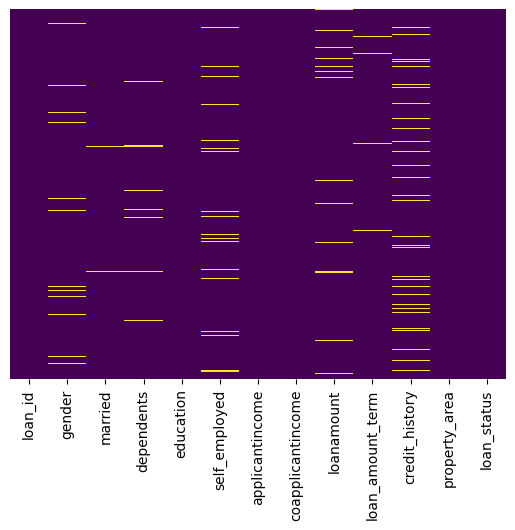

In [64]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## Categorical data

In [65]:
df['gender'].fillna(df['gender'].mode()[0], inplace=True)
df['married'].fillna(df['married'].mode()[0], inplace=True)
df['dependents'].fillna(df['dependents'].mode()[0], inplace=True)
df['self_employed'].fillna(df['self_employed'].mode()[0], inplace=True)

## Numerical value

In [66]:
df['loanamount'].fillna(df['loanamount'].mean(), inplace=True)
df['credit_history'].fillna(df['credit_history'].mean(), inplace=True)
df['loan_amount_term'].fillna(df['loan_amount_term'].mean(), inplace=True)

In [67]:
df.isnull().sum()

loan_id              0
gender               0
married              0
dependents           0
education            0
self_employed        0
applicantincome      0
coapplicantincome    0
loanamount           0
loan_amount_term     0
credit_history       0
property_area        0
loan_status          0
dtype: int64

In [69]:
# Drop the redundant feature 'loan_id'
df.drop(columns=['loan_id'], inplace=True)

In [70]:
df.head(5)

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,male,no,0.0,graduate,no,5849,0.0,146.412162,360.0,1.0,urban,y
1,male,yes,1.0,graduate,no,4583,1508.0,128.000000,360.0,1.0,rural,n
2,male,yes,0.0,graduate,yes,3000,0.0,66.000000,360.0,1.0,urban,y
3,male,yes,0.0,not graduate,no,2583,2358.0,120.000000,360.0,1.0,urban,y
4,male,no,0.0,graduate,no,6000,0.0,141.000000,360.0,1.0,urban,y


## 4. Visualize the distribution of the target column 'loan_status' with respect to various categorical features and write your observations.

In [88]:
cat_features = ['gender', 'married','education', 'property_area', 'self_employed', 'dependents']

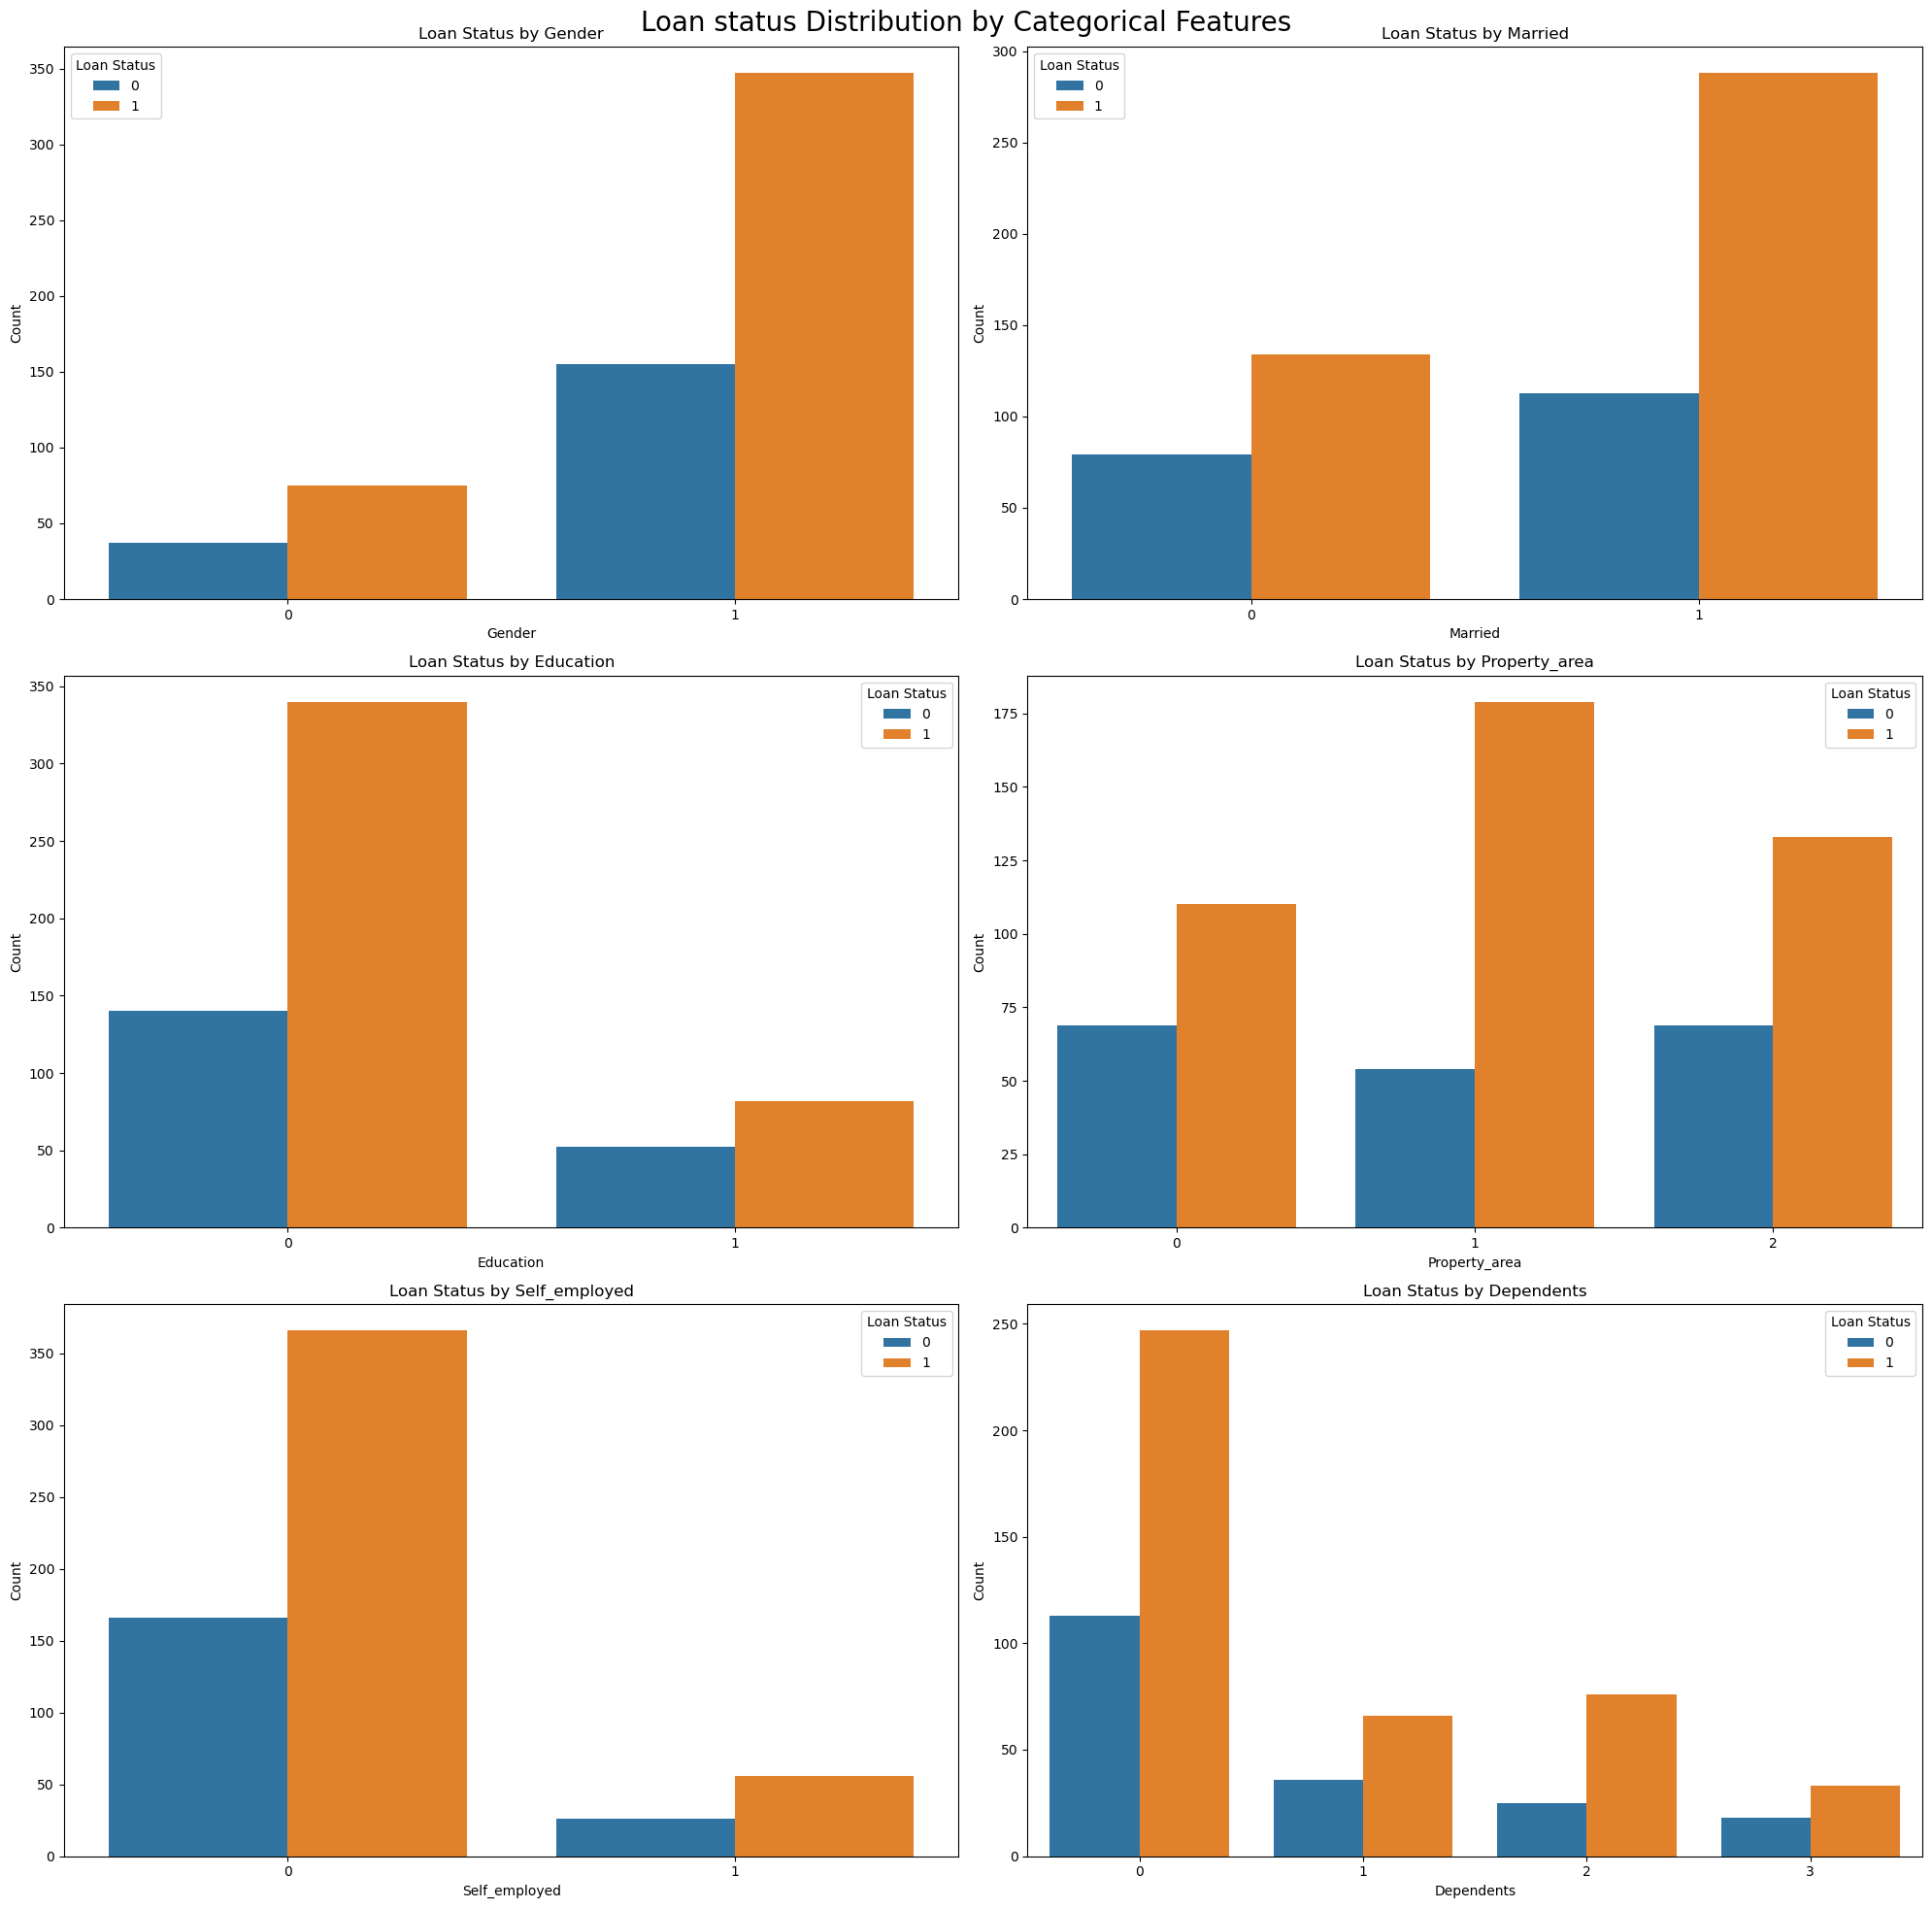

In [94]:
#create subplots
fig, axes = plt.subplots(3, 2, figsize=(20,20))
fig.suptitle('Loan status Distribution by Categorical Features', fontsize=20)

#flatten the axes array
axes = axes.flatten()

for i, feature in enumerate(cat_features):
    sns.countplot(x=feature, hue='loan_status', data=df, ax=axes[i])
    axes[i].set_title(f'Loan Status by {feature.capitalize()}')
    axes[i].set_xlabel(feature.capitalize())
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Loan Status')

plt.tight_layout()
plt.show()


## 5. Encode the categorical data.

In [95]:
encoder = LabelEncoder()
df['gender'] = encoder.fit_transform(df['gender'])
df['married'] = encoder.fit_transform(df['married'])
df['education'] = encoder.fit_transform(df['education'])
df['self_employed'] = encoder.fit_transform(df['self_employed'])
df['property_area'] = encoder.fit_transform(df['property_area'])
df['loan_status'] = encoder.fit_transform(df['loan_status'])
df['dependents'] = df['dependents'].replace('3+', 3).astype(int)

## 6. Separate the target and independent features and split the data into train and test.

In [96]:
# Separate target and independent features
y = df['loan_status']
X = df.drop(columns='loan_status')

In [97]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
## 7. Build any classification model to predict the loan status of the customer and save your model using pickle.

In [98]:
# Identify categorical features
categorical_features = ['gender', 'married', 'dependents', 'education', 'self_employed', 'property_area']
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [99]:
# Preprocess categorical features with one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'  # Pass through numerical features
)

In [100]:
# Create a pipeline with preprocessing and the model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])


In [101]:
# Train the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['gender', 'married',
                                                   'dependents', 'education',
                                                   'self_employed',
                                                   'property_area'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [102]:
# Save the model using pickle
with open('loan_eligibility_model.pkl', 'wb') as file:
    pickle.dump(pipeline, file)

print("Model training and saving completed successfully.")

Model training and saving completed successfully.
